### exchange-rate.csv

In [2]:
import numpy as np
import pandas as pd
import re

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

# I. Data Cleaning

- Handle missing values
- Remove duplicates/irrelevant or hard to preprocess variables
- Clean text data with an incorrect format

In [143]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("exchange_rate.csv")

* Frequency : 15 Minutes
* Time Series : 8
* Total Observations: 60,704
* Test Observations: 12,136
* Rolled Forecast Evaluation Data points: 8.76e6
* Horizon: {96, 192, 336, 720}

In [107]:
7588*8

60704

In [108]:
df.head()

,date,0,1,2,3,4,5,6,OT
0,1990/1/1 0:00,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.525486,0.5930
1,1990/1/2 0:00,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.523972,0.5940
2,1990/1/3 0:00,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.526316,0.5973
3,1990/1/4 0:00,0.7860,1.6370,0.862069,0.650618,0.211242,0.006953,0.523834,0.5970
4,1990/1/5 0:00,0.7849,1.6530,0.861995,0.656254,0.211242,0.006940,0.527426,0.5985


Here is a description of each column in the dataset. <br>

| Column | Description |
| ------ | ------------ |
| **date** | Date |
| **0** | Australia |
| **1** | UK |
| **2** | Canada |
| **3** | Switzerland |
| **4** | China |
| **5** | Japan |
| **6** | New Zealand |
| **OT** | Singapore |

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7588 non-null   object 
 1   0       7588 non-null   float64
 2   1       7588 non-null   float64
 3   2       7588 non-null   float64
 4   3       7588 non-null   float64
 5   4       7588 non-null   float64
 6   5       7588 non-null   float64
 7   6       7588 non-null   float64
 8   OT      7588 non-null   float64
dtypes: float64(8), object(1)
memory usage: 533.7+ KB


In [110]:
# Get general information on the dataset (ncol, nrow, nbr missing values, dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7588 non-null   object 
 1   0       7588 non-null   float64
 2   1       7588 non-null   float64
 3   2       7588 non-null   float64
 4   3       7588 non-null   float64
 5   4       7588 non-null   float64
 6   5       7588 non-null   float64
 7   6       7588 non-null   float64
 8   OT      7588 non-null   float64
dtypes: float64(8), object(1)
memory usage: 533.7+ KB


* There is no non-null values.
* The data type of date column is an object, and other columns are float64.
* The number of rows and columns present in the dataset is : 7588 rows and 9 columnns.

In [111]:
# Number of missing values for each variable
df.isna().sum()

date    0
0       0
1       0
2       0
3       0
4       0
5       0
6       0
OT      0
dtype: int64

In [112]:
df["date"].nunique()

7588

# II. Data exploration

In [113]:
def convert_date(df):
    """
    Convert the 'date' column in the DataFrame to datetime format
    Args:
    df(pd.DataFrame): Innput DataFrame containing the 'date' object.
    Returns:
    pd.DataFrame: DataFrame with 'date' column converted to datetijme format.
    """

    if 'date' not in df.columns:
        raise KeyError("no 'date' column.")
    
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
        
    if df['date'].isnull().any():
        raise ValueError("Some values in the 'date' column could not be converted to datetime.")
    
    return df

In [144]:
convert_date(df)

,date,0,1,2,3,4,5,6,OT
0,1990-01-01,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.525486,0.593000
1,1990-01-02,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.523972,0.594000
2,1990-01-03,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.526316,0.597300
3,1990-01-04,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.523834,0.597000
4,1990-01-05,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.527426,0.598500
...,...,...,...,...,...,...,...,...,...
7583,2010-10-06,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.688565,0.690846
7584,2010-10-07,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.690288,0.695701
7585,2010-10-08,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.691419,0.695943
7586,2010-10-09,0.720825,1.233905,0.744131,0.980344,0.143993,0.008555,0.690942,0.692689


In [145]:
 # Set the 'date' column as the index
df.set_index('date', inplace=True)

In [120]:
def plot_time_series(df):
    """
    Plot time series data from t
    """

    # Create a plot with one subplot per column
    plt.figure(figsize=(10,6))

    # Plot each time series column
    for column in df.columns:
        plt.plot(df.index, df[column], label=column)

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title('Time series data')

    plt.legend(title='Columnns')

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    

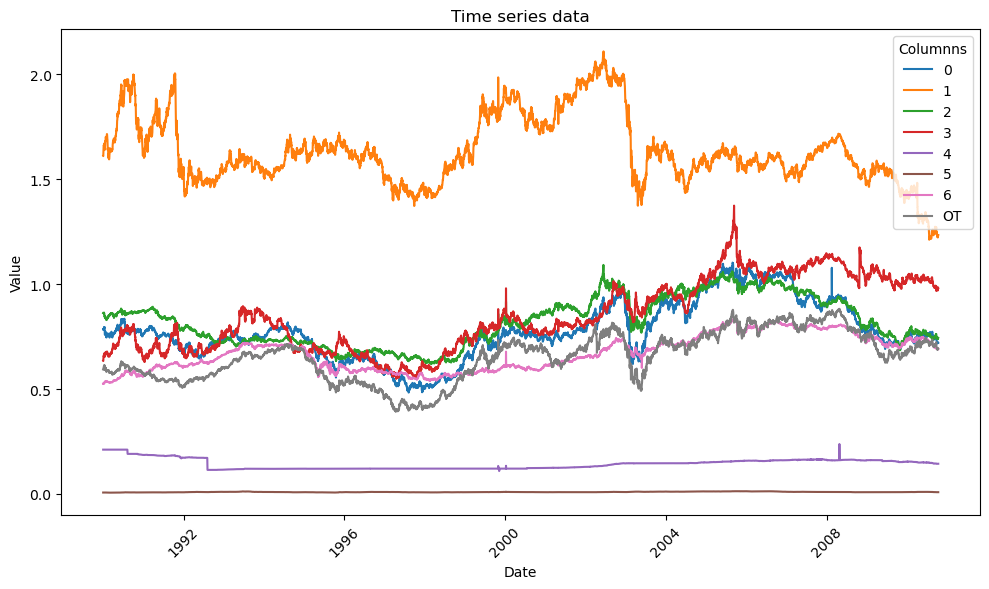

In [121]:
plot_time_series(df)

In [122]:
def plot_time_series(df, column=None, months_for_legend=6):
    """
    Plot time series data. If a column is specified, it will plot that column.
    If no column is specified, it will plot all columns.

    """

    if column is not None:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' not founnd in DataFrame.")
        
        data_to_plot = df[[column]]
    else:
        data_to_plot = df

    # Plot the data
    plt.figure(figsize=(12, 6))
    for col in data_to_plot.columns:
        plt.plot(data_to_plot.index, data_to_plot[col], label=col)

    # Add legend
    legend_labels = data_to_plot.columns
    plt.legend(legend_labels, loc='upper left')

    # Format x-axis for better readability
    plt.xticks(rotation=45)
    if months_for_legend > 0:
        xticks = pd.date_range(start=df.index.min(), end=df.index.max(), freq=f'{months_for_legend}MS')
        plt.xticks(ticks=xticks, labels=xticks.strftime('%Y-%m'))

    # Add titles and labels
    plt.title("Time Series Plot")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

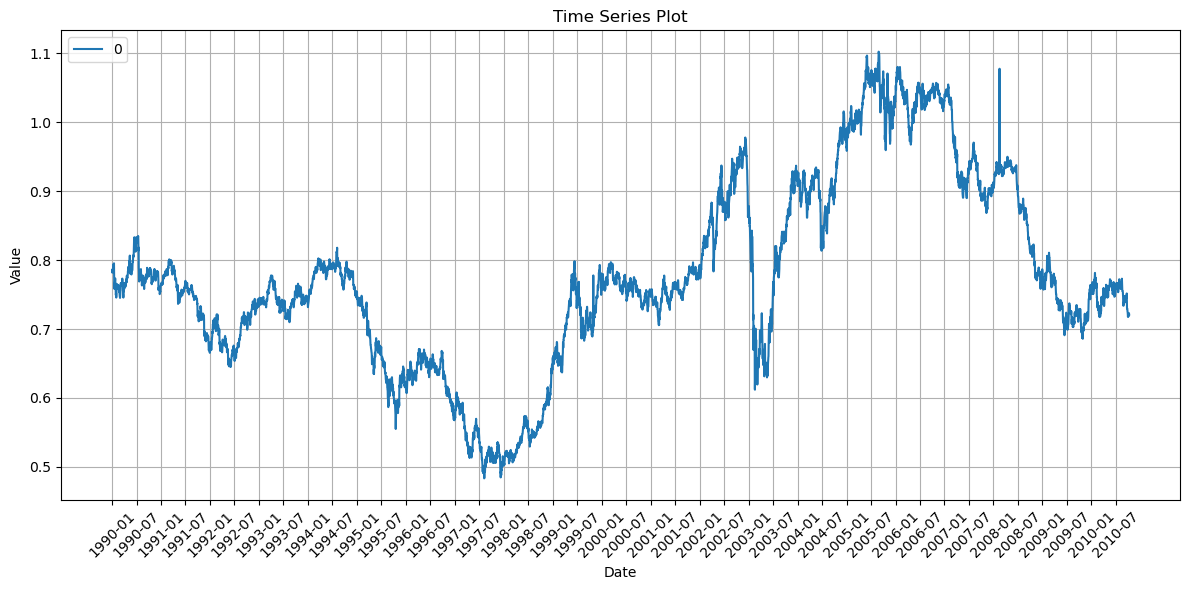

In [123]:
# plot shown in page 13
plot_time_series(df, column='0')

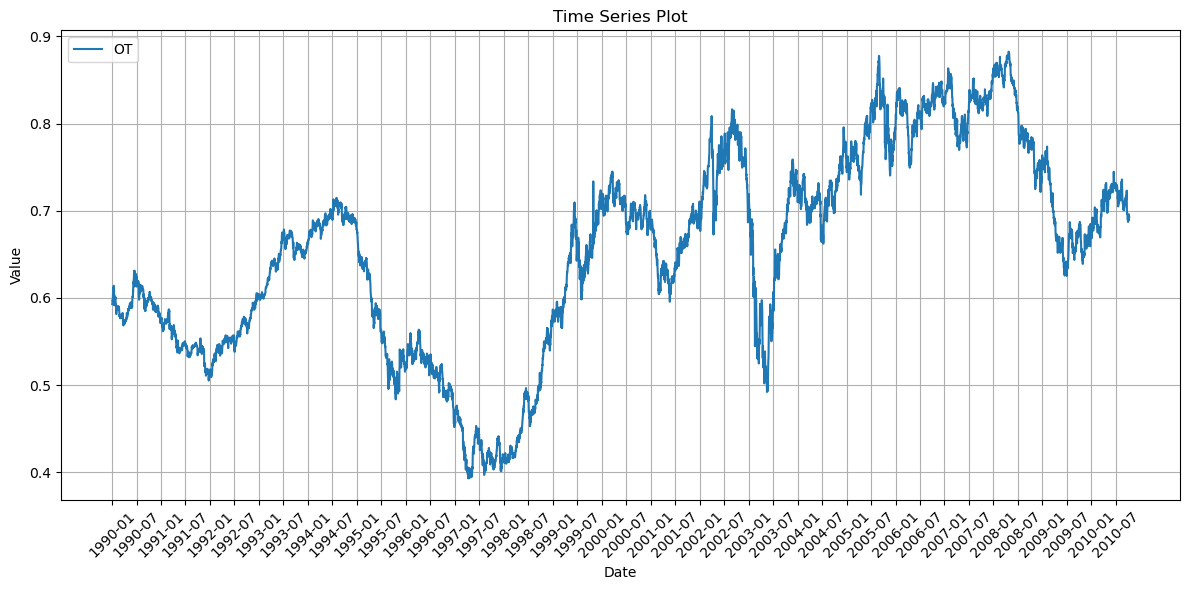

In [124]:
plot_time_series(df, column='OT')

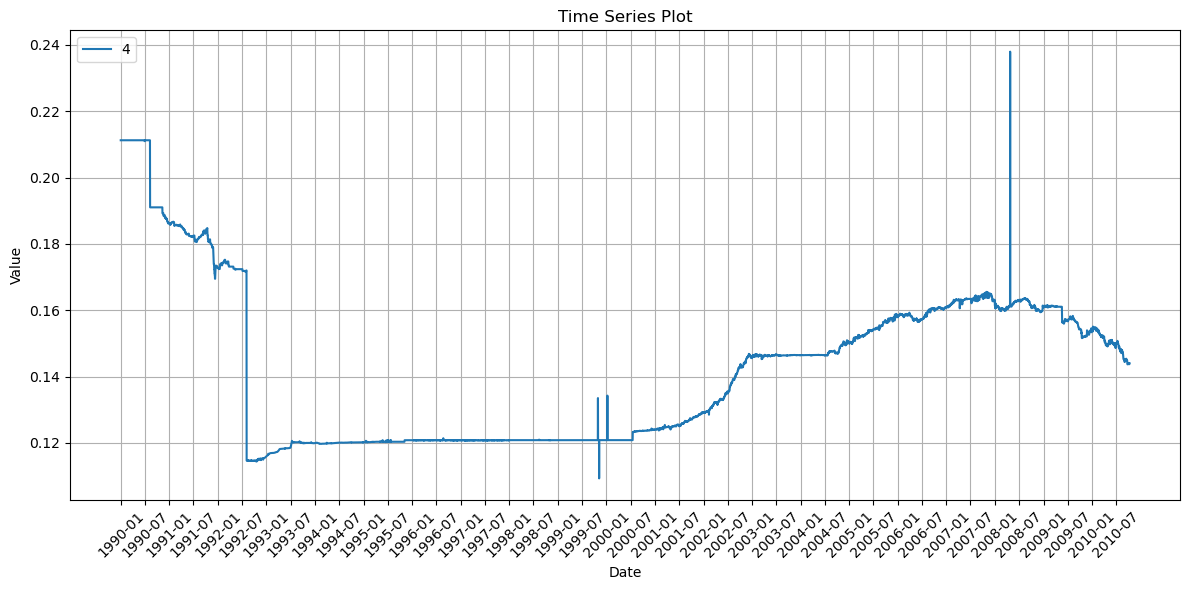

In [125]:
plot_time_series(df, column='4')

# III. Feature engineering (Data Preprocessing)

### **Train-Test Split**

In [126]:
def split_data(data):
    """
    splits dataset innto train, validation, and test sets.
    """
    total_rows = len(data)
    test_size = int(total_rows*0.2) # Last 20 % for test
    valid_size = int(total_rows*0.1) # 10% before the test for validation
    train_size = total_rows - test_size - valid_size # Remaining for training
    
    train = data.iloc[:train_size]
    valid = data.iloc[train_size:train_size+valid_size]
    test = data.iloc[train_size+valid_size:]

    return train, valid, test

In [147]:
train, valid, test = split_data(df)

In [148]:
train

,0,1,2,3,4,5,6,OT
date,,,,,,,,
1990-01-01,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.525486,0.593000
1990-01-02,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.523972,0.594000
1990-01-03,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.526316,0.597300
1990-01-04,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.523834,0.597000
1990-01-05,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.527426,0.598500
...,...,...,...,...,...,...,...,...
2004-07-14,0.848464,1.469508,0.969368,0.875151,0.146432,0.010965,0.712099,0.686106
2004-07-15,0.847242,1.451000,0.963391,0.867002,0.146364,0.010917,0.712555,0.687663
2004-07-16,0.850557,1.455752,0.968429,0.870322,0.146364,0.010905,0.713216,0.689798


In [149]:
valid

,0,1,2,3,4,5,6,OT
date,,,,,,,,
2004-07-19,0.862589,1.481065,0.973217,0.883080,0.146342,0.010932,0.718081,0.696864
2004-07-20,0.865276,1.482514,0.976276,0.887233,0.146342,0.010946,0.717566,0.698812
2004-07-21,0.866176,1.481438,0.971817,0.899475,0.146428,0.011005,0.718339,0.702839
2004-07-22,0.869716,1.480341,0.978636,0.900414,0.146443,0.011013,0.722596,0.705119
2004-07-23,0.870095,1.482272,0.979154,0.901713,0.146443,0.011020,0.721163,0.704970
...,...,...,...,...,...,...,...,...
2006-08-11,1.027591,1.604235,1.022809,1.070286,0.159248,0.012755,0.814266,0.818800
2006-08-12,1.022349,1.607149,1.020096,1.071455,0.159569,0.012763,0.818264,0.816993
2006-08-13,1.023395,1.607446,1.020721,1.071019,0.159569,0.012752,0.818130,0.816860


In [150]:
test

,0,1,2,3,4,5,6,OT
date,,,,,,,,
2006-08-16,1.026905,1.611733,1.014096,1.079214,0.159627,0.012674,0.819672,0.813603
2006-08-17,1.037344,1.615600,1.020825,1.083893,0.159862,0.012695,0.822368,0.822301
2006-08-18,1.038875,1.613424,1.018838,1.084222,0.159939,0.012622,0.821271,0.821693
2006-08-19,1.032855,1.600499,1.007151,1.077354,0.159877,0.012606,0.819169,0.816593
2006-08-20,1.033293,1.600551,1.006948,1.077261,0.159882,0.012607,0.819001,0.815927
...,...,...,...,...,...,...,...,...
2010-10-06,0.718494,1.222195,0.737485,0.969974,0.143697,0.008500,0.688565,0.690846
2010-10-07,0.721839,1.223459,0.741155,0.977297,0.143763,0.008595,0.690288,0.695701
2010-10-08,0.723197,1.234111,0.745184,0.984446,0.143997,0.008562,0.691419,0.695943


* Train : from 1990-01-01 to 2004-07-18
* Validation : from 2004-07-19 to 2006-08-15
* Test : from 2006-08-16 to 2010-10-10

In [151]:
1517*8

12136

In [152]:
train

,0,1,2,3,4,5,6,OT
date,,,,,,,,
1990-01-01,0.785500,1.611000,0.861698,0.634196,0.211242,0.006838,0.525486,0.593000
1990-01-02,0.781800,1.610000,0.861104,0.633513,0.211242,0.006863,0.523972,0.594000
1990-01-03,0.786700,1.629300,0.861030,0.648508,0.211242,0.006975,0.526316,0.597300
1990-01-04,0.786000,1.637000,0.862069,0.650618,0.211242,0.006953,0.523834,0.597000
1990-01-05,0.784900,1.653000,0.861995,0.656254,0.211242,0.006940,0.527426,0.598500
...,...,...,...,...,...,...,...,...
2004-07-14,0.848464,1.469508,0.969368,0.875151,0.146432,0.010965,0.712099,0.686106
2004-07-15,0.847242,1.451000,0.963391,0.867002,0.146364,0.010917,0.712555,0.687663
2004-07-16,0.850557,1.455752,0.968429,0.870322,0.146364,0.010905,0.713216,0.689798


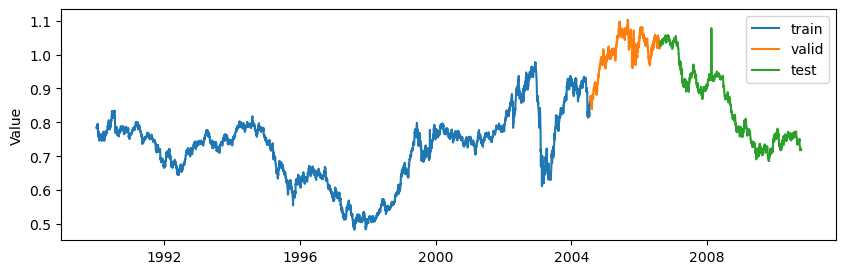

In [153]:
_, ax = plt.subplots(1, figsize=(10,3))
ax.plot(train.index, train["0"], label="train")
ax.plot(valid.index, valid["0"], label="valid")
ax.plot(test.index, test["0"], label="test")
ax.set_ylabel("Value")
ax.legend()

# Unix timestamp
train.index = train.index.astype(int) // 10**9

### **Rolling Window Setup**
* The model uses a sliding window approach to create input-output pairs from the time series data.
* Input (X) : A sequence of past observation ( yt-L:t), where L is the length of the lookback window.
* Output (Y): A sequence of future values (yt+1:t+H), where H is the forecast horizon.

In [25]:
def create_rolling_windows(data, input_size, output_size):
    """ 
    Create rolling window input-output pairs for time series forecasting.

    Args:
        data (numpy array or pandas Series): times series data
        input_size (int): Length of the look-back window (L).
        output_size (int): Forecast horizon (H).
    
    Returns:
        tuple: Two numpy arrays (X,Y) where:
            X is of shape (num_samples, input_size)


    """
    X, Y = [], []
    for i in range(len(data) - input_size - output_size + 1):
        X.append(data[i:i + input_size].values)
        Y.append(data[i + input_size:i + input_size + output_size])
    return np.array(X), np.array(Y)


In [ ]:
# input_size = 30 # past 30 days as input
# output_size = 7 # predict next 7 days
# X_test, Y_test = create_rolling_windows(test['0'], input_size, output_size)

# IV. Model Pipeline

In [29]:
import torch
import torch.nn as nn

**NHiTSBlock**
- a single block with :
    - a fully connected network.
    - a residual connection for error correction
    - trend/seasonnality decomposition via interpolation.

In [48]:
class NHiTSBlock (nn.Module):
    """ 
    A single N-HiTS block for hierarchical interpolationn
    """
    def __init__(self, input_size, output_size, num_layers, hidden_size):
        super(NHiTSBlock, self).__init__()
        self.input_size = input_size
        self.output_size = output_size

        # Define the fully connected network
        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, hidden_size))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_size, output_size))

        self.network = nn.Sequential(*layers) 

    def forward(self,x):
        return self.network(x)

**NHiTS Model**
- a stack of NHiTSBlocks, each refining the residuals of the previous block.

In [49]:
class NHiTS(nn.Module):
    """
    The complete N-HiTS model composed of multiple blocks
    """
    def __init__(self, input_size, output_size, num_blocks, block_params):
        """
        Args:
            input_size (int): Length of the input window (L)
            output_size (int): Length of the forecast horizon (H)
            num_blocks (int): Number of N-HiTS blocks.
            blocks_params (dict): Parameters for each block e.g., layers, hidden_size
        """
        super(NHiTS, self).__init__()
        self.blocks = nn.ModuleList([
            NHiTSBlock(input_size, output_size, **block_params)
            for _ in range(num_blocks)
        ])
    
    def forward(self,x):
        """ 
        Args:
            x (torch.Tensor): Input tensor of shape [batch_size, input_size
        Returns:
            torch.Tensor: Forecast tensor of shape [batch_size, output_size]
        """
        residual = x
        forecast = torch.zeros_like(x[:, :self.blocks[0].output_size])

        for block in self.blocks:
            output = block(residual)
            forecast += output
            residual = residual - output
        
        return forecast

### Hyperparameters:
![title](hyperparam_nhits.png)

In [58]:
hyperparams = {
    'lr': 1e-3,
    'train_steps': 1000,
    'random_seed': 42,
    'H':[96, 192, 336, 720],
    'm': 5,
    'batch_size': 256,
    'S':3,
    'B':1,
    'Nh':512,
    'num_blocks':3,
    'block_params':{
        'num_layers':2,
        'hidden_size':512
    }
}

In [59]:
block_params = hyperparams['block_params']
print(block_params)


{'num_layers': 2, 'hidden_size': 512}


In [64]:
H = hyperparams['H'][0] # H = 192
input_size = hyperparams['m'] *H 

model = NHiTS(
    input_size=input_size,
    output_size=H,
    num_blocks=hyperparams['num_blocks'],
    block_params=hyperparams['block_params']
)

print(f"initialized model with input size {input_size}, output size {H}")

initialized model with input size 480, output size 96


### Training loop

In [67]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [66]:
# random seed for reproducibility
torch.manual_seed(hyperparams['random_seed'])

# loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=hyperparams['lr'])

#learning rate decay (3 times by 0.5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=hyperparams['train_steps'] //3, gamma=0.5)

# Compare with other models
* https://builtin.com/data-science/time-series-forecasting-python ARIMA
